In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy as sp

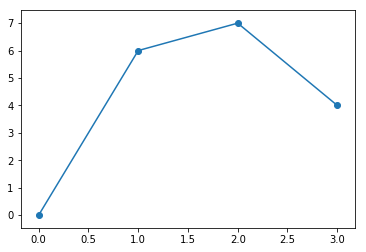

In [3]:
X = [0,1,2,3]
Y = [0,6,7,4]
n = 4
x0 = 2.58
plt.plot(X, Y)
plt.scatter(X, Y)

In [4]:
from scipy.interpolate import CubicSpline
cb = CubicSpline(X, Y)

x_true = [x for x in np.arange(0,3,0.001)]

y_true = [cb(x) for x in np.arange(0,3,0.001)]

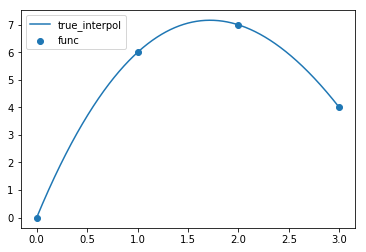

In [5]:
plt.scatter(X, Y, label='func')
plt.plot(x_true, y_true, label='true_interpol')
plt.legend()

In [6]:
float(cb(x0))

5.683051999999999

In [7]:
def absolute_error(y_true, y_new):
    return sum(abs(np.array(y_true)-np.array(y_new)))/len(y_true)

def relative_error(y_true, y_new):
    return sum(abs(np.array(y_true[1:])-np.array(y_new[1:]))/np.array(y_true[1:]))/len(y_true[1:])

def absolute_x0(x0_true, x0_new):
    return abs(x0_true-x0_new)

def relative_x0(x0_true, x0_new):
    return abs(x0_true-x0_new)/x0_true



In [8]:
# интерполяция методом Лагранжа
def Lagr(x, i, xs, ys):
    N = len(xs)-1
    L = 1
    for j in range(0, N):
        if j != i:
            L = L*(x-xs[j])/(xs[i]-xs[j]) 
    L = L*ys[i]
    return L

def Lagrang(x, N, xs, ys):
    s = 0
    for i in range(N):
        s += Lagr(x, i, xs, ys)
    return s

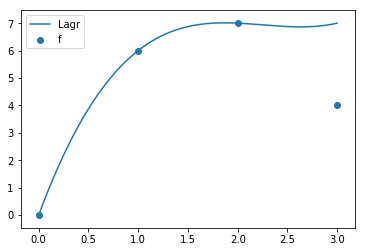

In [10]:
y_Lagrang = [Lagrang(i, n, X, Y) for i in x_true]
plt.plot(x_true, y_Lagrang, label='Lagr')
plt.scatter(X, Y, label='f')
plt.legend()

In [11]:
Lagrang(x0, n, X, Y)

6.865208000000002

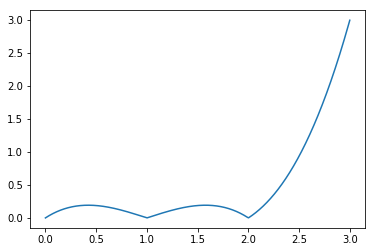

In [14]:
plt.plot(x_true, abs(np.array(y_true)-np.array(y_Lagrang)))

In [15]:
absolute_error(y_true, y_Lagrang)

0.45783337499999976

In [16]:
relative_error(y_true, y_Lagrang)

0.09835186924842436

In [80]:
def product(val, n ):
    """ Вспомогательный генератор для вычисления произведения разностей координат """
    mul = 1
    for i in range(n):
        if i: mul *= val - X[i-1]
        yield mul
        
C=[] # список коэффициентов полинома

# вычисляем коэффициенты
for n in range(len(X)):
    p = product(X[n], n+1 )
    C.append((Y[n]-sum(C[k]*next(p) for k in range(n)) )/next(p) )

def Newton(v):
    """ Значение полинома в точке v """
    return sum( C[k]*p for k, p in enumerate(product(v, len(C)) ) )

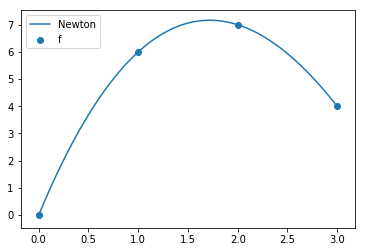

In [81]:
y_Newton = [Newton(i) for i in x_true]
plt.plot(x_true, y_Newton, label='Newton')
plt.scatter(X, Y, label='f')
plt.legend()

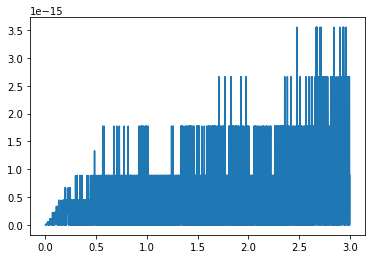

In [82]:
plt.plot(x_true, abs(np.array(y_true)-np.array(y_Newton)))

In [20]:
Newton(x0)

5.683052

In [21]:
absolute_error(y_true, y_Newton)

5.867222217329863e-16

In [22]:
relative_error(y_true, y_Newton)

1.1570245986142296e-16

In [23]:
def cubic_interp1d(x0, x, y):
    
    x = np.asfarray(x)
    y = np.asfarray(y)

    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    Li[0] = math.sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = math.sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = math.sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + zi1/(6*hi1)*(x0-xi0)**3+\
    (yi1/hi1 - zi1*hi1/6)*(x0-xi0) +(yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

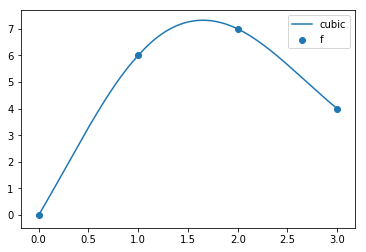

In [24]:
y_cubic = cubic_interp1d(x_true, X, Y)
plt.plot(x_true, y_cubic, label='cubic')
plt.scatter(X, Y, label='f')
plt.legend()

In [25]:
cubic_interp1d([2.58], X, Y)[0]

5.386064039398189

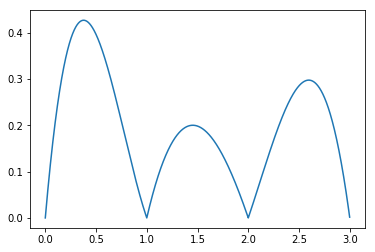

In [26]:
plt.plot(x_true, abs(np.array(y_true)-np.array(y_cubic)))

In [27]:
absolute_error(y_true, y_cubic)

0.1953743406616144

In [28]:
relative_error(y_true, y_cubic)

0.057285990300342024

In [29]:
import scipy as scp

def srkverr(y, y_new):
    return (1/len(y))*sum([(abs(y[i]-y_new[i]))**2 for i in range(len(y))])

def mnkGP(x, y, d, x0):
    #d - степень полинома
    f = scp.poly1d(scp.polyfit(x, y, d, full=True)[0])       
    return f(x0)
  


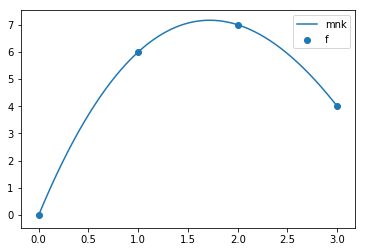

In [37]:
y_mnk = [mnkGP(X, Y, 3, i) for i in x_true]
plt.plot(x_true, y_mnk, label='mnk')
plt.scatter(X, Y, label='f')
plt.legend()

In [36]:
mnkGP(X, Y, 3, x0)

5.683051999999997

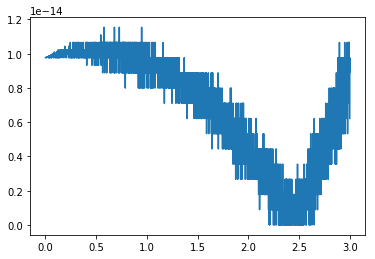

In [83]:
plt.plot(x_true, abs(np.array(y_true)-np.array(y_mnk)))

In [39]:
absolute_error(y_true, y_mnk)

6.912530154760492e-15

In [40]:
relative_error(y_true, y_mnk)

3.515545706338894e-15

In [41]:
def SLAU(x, y, x0):
    M = []
    v = np.array(y)
    n = len(x)
    for i in range(n):
        m = [1.]
        for j in range(1, n):
            m.append(float(x[i]**j))
        M.append(m)
    M = np.array(M)
    coeffs1 = np.linalg.solve(M ,v)
    return coeffs1[0]+coeffs1[1]*x0+coeffs1[2]*(x0**2)+coeffs1[3]*(x0**3)

In [42]:
SLAU(X, Y, 2.58)

5.6830520000000035

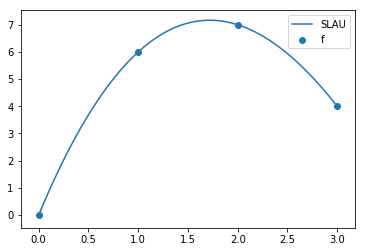

In [43]:
y_SLAU = [SLAU(X, Y, i) for i in x_true]
plt.plot(x_true, y_SLAU, label='SLAU')
plt.scatter(X, Y, label='f')
plt.legend()

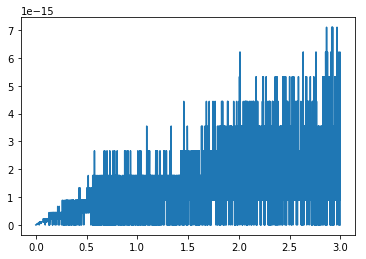

In [45]:
plt.plot(x_true, abs(np.array(y_true)-np.array(y_SLAU)))

In [46]:
absolute_error(y_true, y_SLAU)

1.3847227762579332e-15

In [47]:
relative_error(y_true, y_SLAU)

2.553755566642729e-16

In [48]:
x_extra_true = [x for x in np.arange(3, 5, 0.001)]
y_extra_true = [cb(i) for i in x_extra_true]

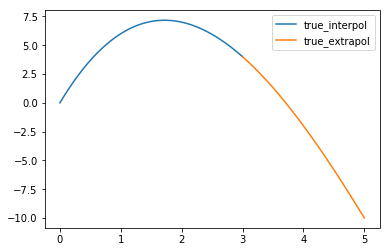

In [49]:
plt.plot(x_true, y_true, label='true_interpol')
plt.plot(x_extra_true, y_extra_true, label='true_extrapol')
plt.legend()

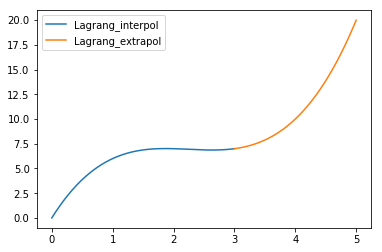

In [50]:
y_extra_Lagrang = [Lagrang(i, 4, X, Y) for i in x_extra_true]
plt.plot(x_true, y_Lagrang, label='Lagrang_interpol')
plt.plot(x_extra_true, y_extra_Lagrang, label='Lagrang_extrapol')
plt.legend()

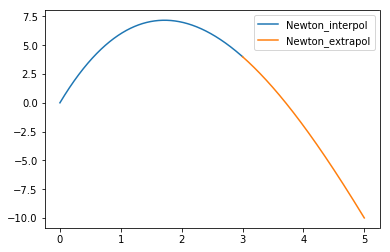

In [51]:
y_extra_Newton = [Newton(i) for i in x_extra_true]
plt.plot(x_true, y_Newton, label='Newton_interpol')
plt.plot(x_extra_true, y_extra_Newton, label='Newton_extrapol')
plt.legend()

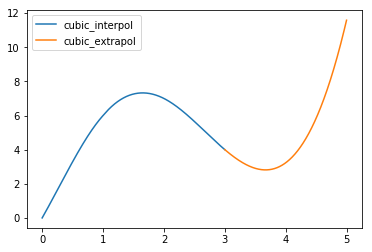

In [60]:
y_extra_cubic = cubic_interp1d(x_extra_true, X, Y)
plt.plot(x_true, y_cubic, label='cubic_interpol')
plt.plot(x_extra_true, y_extra_cubic, label='cubic_extrapol')
plt.legend()

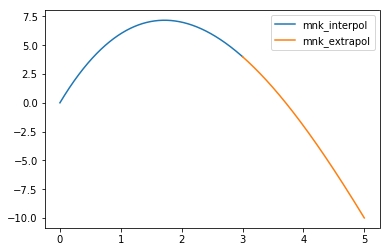

In [53]:
y_extra_mnk = [mnkGP(X, Y, 3, i) for i in x_extra_true]
plt.plot(x_true, y_mnk, label='mnk_interpol')
plt.plot(x_extra_true, y_extra_mnk, label='mnk_extrapol')
plt.legend()

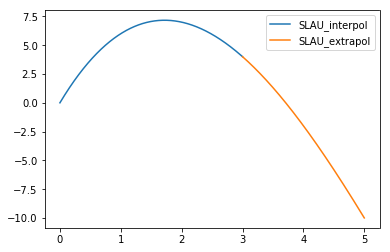

In [54]:
y_extra_SLAU = [SLAU(X, Y, i) for i in x_extra_true]
plt.plot(x_true, y_SLAU, label='SLAU_interpol' )
plt.plot(x_extra_true, y_extra_true, label='SLAU_extrapol')
plt.legend()

In [55]:
absolute_error(y_extra_true, y_extra_Lagrang), relative_error(y_extra_true, y_extra_Lagrang)

(13.493250749998166, -1.891453123834704)

In [56]:
absolute_error(y_extra_true, y_extra_Newton), relative_error(y_extra_true, y_extra_Newton)

(3.4792169145703157e-15, -5.205974389749e-16)

In [57]:
absolute_error(y_extra_true, y_extra_cubic), relative_error(y_extra_true, y_extra_cubic)

(7.082643495188543, -1.287743490318196)

In [58]:
absolute_error(y_extra_true, y_extra_mnk), relative_error(y_extra_true, y_extra_mnk)

(3.813050071001245e-14, -3.9370878159449e-15)

In [59]:
absolute_error(y_extra_true, y_extra_SLAU), relative_error(y_extra_true, y_extra_SLAU)

(4.8706594313330245e-15, -5.81054427211394e-16)

In [61]:
def simpson_rule(func, a, b, nseg):
    """Правило Симпсона
       nseg - число отрезков, на которые разбивается [a;b]"""
    if nseg%2 == 1:
        nseg += 1
    dx = 1.0 * (b - a) / nseg
    sum = (func(a) + 4 * func(a + dx) + func(b))
    for i in range(1, int(nseg/2)):
        sum += 2 * func(a + (2 * i) * dx) + 4 * func(a + (2 * i + 1) * dx)

    return sum * dx / 3

In [62]:
simpson_rule(cb, 0, 3, 1000)

16.124999999999996

In [63]:
simpson_rule(Newton, 0, 3, 1000)

16.125

In [64]:
def dif1(f, x, h):
    return (f(x+h)-f(x))/h


In [65]:
dif1(cb, x0, 0.01)

-3.3355499999998983

In [66]:
dif1(Newton, x0, 0.01)

-3.3355499999998983

In [67]:
absolute_x0(float(cb(x0)), Lagrang(x0, n, X, Y))

0.3940519999999976

In [68]:
relative_x0(float(cb(x0)), Lagrang(x0, n, X, Y))

0.06933809509397375

In [69]:
absolute_x0(float(cb(x0)), Newton(x0))

8.881784197001252e-16

In [70]:
relative_x0(float(cb(x0)), Newton(x0))

1.5628546416610746e-16

In [71]:
absolute_x0(float(cb(x0)), cubic_interp1d([x0], X, Y)[0])

0.2969879606018102

In [72]:
relative_x0(float(cb(x0)), cubic_interp1d([x0], X, Y)[0])

0.05225853302095604

In [73]:
absolute_x0(float(cb(x0)), mnkGP(X, Y, 3, x0))

1.7763568394002505e-15

In [74]:
relative_x0(float(cb(x0)), mnkGP(X, Y, 3, x0))

3.1257092833221493e-16

In [75]:
absolute_x0(float(cb(x0)), SLAU(X, Y, x0))

4.440892098500626e-15

In [76]:
relative_x0(float(cb(x0)), SLAU(X, Y, x0))

7.814273208305374e-16